In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential


In [2]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_x = train_x.astype('float32') / 255 # Similar to feature scaling
test_x = test_x.astype('float32') / 255


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Preparing the dataset
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)



In [5]:
model = Sequential()
model.add(Dense(units=256,activation="relu",input_shape=(784,)))
model.add(Dropout(0.4))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=10,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])



In [7]:
H=model.fit(train_x,train_y,batch_size=2048,epochs=100)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.2694 - loss: 2.0279
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7124 - loss: 0.8637
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8605 - loss: 0.4886
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9039 - loss: 0.3658
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9206 - loss: 0.3010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9344 - loss: 0.2547
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9416 - loss: 0.2294
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9477 - loss: 0.2044
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9550 - loss: 0.1776
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9582 - loss: 0.1686
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9604 - loss: 0.1603
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accura

In [8]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=1024)

print("Accuracy: ",accuracy[1])

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9799 - loss: 0.1122
Accuracy:  0.9829999804496765


In [9]:
H.history.keys() # To check which information does it contain

dict_keys(['accuracy', 'loss'])

In [10]:
H.history['accuracy']

[0.3998166620731354,
 0.7582666873931885,
 0.873199999332428,
 0.9083999991416931,
 0.9260500073432922,
 0.9359666705131531,
 0.9438166618347168,
 0.9498999714851379,
 0.9544333219528198,
 0.9573333263397217,
 0.9608666896820068,
 0.9625999927520752,
 0.9645166397094727,
 0.9660166501998901,
 0.9698500037193298,
 0.9708499908447266,
 0.9713333249092102,
 0.9729333519935608,
 0.9741166830062866,
 0.9746333360671997,
 0.9760333299636841,
 0.9778000116348267,
 0.9780499935150146,
 0.9783333539962769,
 0.9790833592414856,
 0.9808499813079834,
 0.9808333516120911,
 0.9809666872024536,
 0.981333315372467,
 0.9826666712760925,
 0.9824666380882263,
 0.9831500053405762,
 0.9834499955177307,
 0.9832333326339722,
 0.9837499856948853,
 0.9844333529472351,
 0.9854666590690613,
 0.984499990940094,
 0.9855166673660278,
 0.9848666787147522,
 0.9853333234786987,
 0.986133337020874,
 0.9870333075523376,
 0.9866666793823242,
 0.9873999953269958,
 0.987333357334137,
 0.9874500036239624,
 0.987266659736633

In [11]:
import plotly.express as px

px.line(y=H.history['accuracy'],title='Accuracy')

In [12]:
px.line(y=H.history['loss'],title='Loss')

## Predictions for your images (optional)

In [13]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [14]:
%cd /content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 3

/content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 3


In [15]:
from utils import *

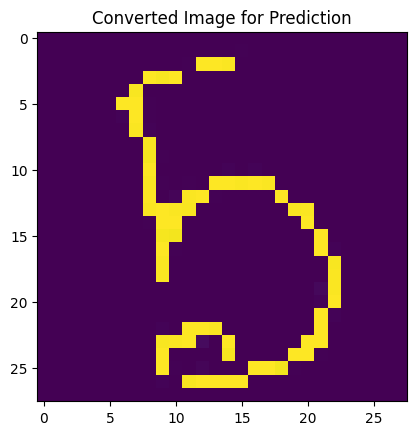

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step
Predictions for each class [[8.5346168e-05 2.1990074e-04 5.0848856e-04 2.8194085e-01 4.4908011e-05
  7.1356612e-01 1.5575194e-04 7.1214559e-04 3.6875982e-04 2.3977507e-03]]
Predicted value is 5


In [16]:
predict('images/num_15.jpg',model=model,con_dest='images/con_num_15.jpg')